# DIgital Epidemiology Project 

## Modules

In [3]:
# Network Data Science 
import networkx as nx

# Data Wrangling
import numpy as np

# Network Data Analysis 
import networkx as nx
import geonetworkx as gnx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib import colors
import netwulf as nw
%pylab inline

# Geo-Spatial Data Analysis
import geopandas as gpd
###import georaster as gr
import pandas as pd
from shapely.geometry import Point, LineString
###import pysal as ps
###from pysal.contrib.viz import mapping as maps

# Other Utilities
from operator import itemgetter
from collections import defaultdict
import random 
from sklearn.preprocessing import normalize

# Custom Modules
import digital_epidemiology as depi

# Reload Custom Modules
from importlib import reload
depi = reload(depi)

Populating the interactive namespace from numpy and matplotlib


## Data Wrangling 

### Geospatial 

#### Provinces (NUTS 3)

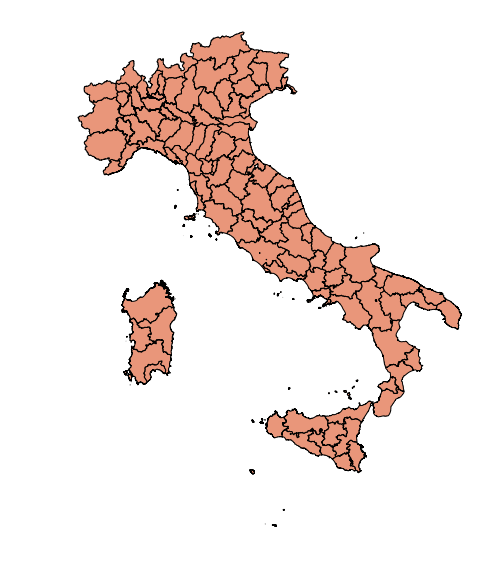

In [2]:
# Set geodata file path
##provinces = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp" # PIETRO 1
provinces = "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp" # PIETRO 2
##provinces = r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject/Data\Shapefiles\ProvCM01012020\ProvCM01012020_WGS84.shp" # DAVIDE

### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp" (AREA)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndL.shp" (LINE)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndA.shp" (AREA)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/NUTS_3.shp"  (AREA)

# Store data
provincial_data = gpd.read_file(provinces)

# Visualize GeoDataFrame
provincial_data.plot(figsize=(10, 10),
                     color='darksalmon', 
                     edgecolor='black',
                     alpha=1).set_axis_off()

### Mobility

Source: [Matrici del Pensolarismo (2011)](https://www.istat.it/it/archivio/139381)

In [36]:
# Load Commuting Graph Data
##commuting_edgelist = pd.read_csv("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/ProvincialCommutingGraph.csv") # PIETRO 1 
commuting_edgelist = pd.read_csv("/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/ProvincialCommutingGraph.csv") # PIETRO 2 
##commuting_edgelist = pd.read_csv(r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject\Data\CSV\ProvincialCommutingGraph.csv") # DAVIDE

commuting_edgelist

,source,target,weight
0,1,0,142
1,1,1,1110142
2,1,2,3123
3,1,3,880
4,1,4,8216
...,...,...,...
4192,110,77,48
4193,110,78,1
4194,110,79,2
4195,110,101,1


In [48]:
commuting_graph = nx.from_pandas_edgelist(commuting_edgelist, edge_attr=True)

CONNECTIVITY:
• 111 nodes;
• 2450 edges.


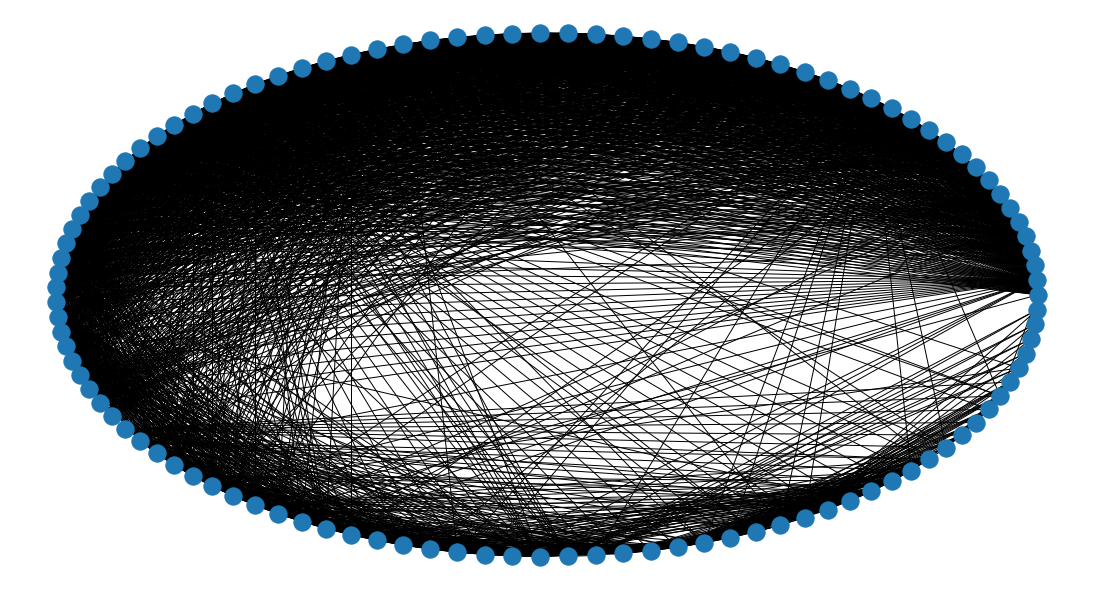

In [56]:
# Showcase connectivity
print("CONNECTIVITY:\n•",commuting_graph.number_of_nodes(),"nodes;\n•",commuting_graph.number_of_edges(),"edges.")

# Visualize Graph
#fig=plt.figure(figsize=(15,8))
#nx.draw_circular(commuting_graph)
#plt.axis('off')
#plt.show()


```nw.visualize(commuting_graph)```

![Commuting Graph Visualization](commuting_graph.png)

In [59]:
mobility_data = pd.read_csv("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/Pepe2020/flow.csv")[['origin','destination','flow']].rename(columns={'origin':'source', 'destination':'target', 'flow':'weight'})
mobility_edgelist = [tuple(weighted_edge) for weighted_edge in mobility_data.to_numpy()]
#mobility_edgelist

In [60]:
mobility_graph = nx.DiGraph()
mobility_graph.add_weighted_edges_from(mobility_edgelist)
#nw.visualize(mobility_graph)

In [61]:
#nx.draw(mobility_graph)
###mobility_adj_matrix = nx.adj_matrix(mobility_graph)

### Contact

* Prem K, Cook AR, Jit M (2017). [Projecting social contact matrices in 152 countries using contact surveys and demographic data](https://doi.org/10.1371/journal.pcbi.1005697). PLoS Comput Biol 13(9).
* Kiesha Prem et al. (2020). [Projecting contact matrices in 177 geographical regions: an update and comparison with empirical data for the COVID-19 era](https://doi.org/10.1101/2020.07.22.20159772). medRxiv pre-print. 

In [4]:
##np.genfromtxt("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/ContactMatrixAllLocations.csv", delimiter=',', names=True) # PIETRO 1

all_locations = np.genfromtxt("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/ContactMatrixAllLocations.csv", delimiter=',', names=True) # PIETRO 2

contact_data = pd.read_csv("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/ContactMatrixAllLocations.csv") # PIETRO 2

##np.genfromtxt(r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject\Data\CSV\2020\ContactMatrixAllLocations.csv", delimiter=',', names=True) # DAVIDE 

In [5]:
contact_graph = nx.from_numpy_array(contact_data.to_numpy())

In [6]:
contact_graph.edges(data=True)

EdgeDataView([(0, 0, {'weight': 3.0434400000000004}), (0, 1, {'weight': 1.20845}), (0, 2, {'weight': 0.15347}), (0, 3, {'weight': 0.09025}), (0, 4, {'weight': 0.27539}), (0, 5, {'weight': 0.08507}), (0, 6, {'weight': 0.63588}), (0, 7, {'weight': 0.8187399999999999}), (0, 8, {'weight': 0.7374}), (0, 9, {'weight': 0.16633}), (0, 10, {'weight': 0.10944000000000001}), (0, 11, {'weight': 0.2193}), (0, 12, {'weight': 0.23847}), (0, 13, {'weight': 0.13948}), (0, 14, {'weight': 0.04093}), (0, 15, {'weight': 0.1079}), (1, 1, {'weight': 10.1288}), (1, 2, {'weight': 3.08049}), (1, 3, {'weight': 0.34056}), (1, 4, {'weight': 0.15677}), (1, 5, {'weight': 0.13585}), (1, 6, {'weight': 0.37516}), (1, 7, {'weight': 0.9050799999999999}), (1, 8, {'weight': 0.68818}), (1, 9, {'weight': 0.4912}), (1, 10, {'weight': 0.26885}), (1, 11, {'weight': 0.39171999999999996}), (1, 12, {'weight': 0.1547}), (1, 13, {'weight': 0.14594000000000001}), (1, 14, {'weight': 0.08626}), (1, 15, {'weight': 0.12997}), (2, 2, {'we

In [7]:
#nw.visualize(contact_graph)

(None, None)

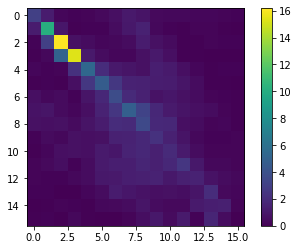

In [52]:
#C = normalize(contact_data.to_numpy(), axis=1, norm='l1')
C = contact_data.to_numpy()
plt.imshow(C)
plt.colorbar()
plt.show()

### Population 

In [9]:
provinces = pd.read_csv("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/Pepe2020/Provinces.csv")
provincial_list = list(provinces.COD_PROV)

provincial_demographics = pd.read_csv("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographics.csv").rename(columns = {'Codice provincia': 'code', 'Provincia': 'name', 'Età': 'age'})# PIETRO 1
#provincial_demographics = pd.read_csv("/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographics.csv") # PIETRO 2 (2012)
##provincial_demographics = pd.read_csv("/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographics.csv") # PIETRO 2 (2020)
##provincial_demographics = pd.read_csv(r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject\Data\CSV\2012\ProvincialDemographics.csv") # DAVIDE

provincial_demographics["population"] = provincial_demographics["Totale Maschi"] + provincial_demographics["Totale Femmine"]
provincial_demographics = provincial_demographics.drop(['Maschi celibi', 'Maschi coniugati', 'Maschi divorziati', 'Maschi vedovi', 'Maschi uniti civilmente', 'Maschi già in unione civile (per scioglimento)', 'Maschi già in unione civile (per decesso del partner)', 'Totale Maschi','Femmine nubili', 'Femmine coniugate', 'Femmine divorziate', 'Femmine vedove', 'Femmine unite civilmente', 'Femmine già in unione civile (per scioglimento)', 'Femmine già in unione civile (per decesso del partner)', 'Totale Femmine'], axis=1)

In [10]:
provincial_demographics

,code,name,age,population
0,1,Torino,0,14648
1,1,Torino,1,15351
2,1,Torino,2,16374
3,1,Torino,3,16950
4,1,Torino,4,17500
...,...,...,...,...
10802,111,Sud Sardegna,96,252
10803,111,Sud Sardegna,97,182
10804,111,Sud Sardegna,98,110
10805,111,Sud Sardegna,99,88


In [11]:
provincial_demographics_under80 = provincial_demographics[provincial_demographics['age'] < 80]

In [12]:
provincial_demographics_under80.reset_index(drop=True, inplace=True)
#provincial_demographics_under80.loc[provincial_demographics_under80["code"] == 1]
#provincial_demographics_under80.to_csv('/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2012/ProvincialDemographicsUnder80.csv', index=False)

In [13]:
b = []

for i in range(1, len(provincial_demographics_under80["population"]), 5):
    b.append(sum(provincial_demographics_under80["population"][i:i+5]))
    #print(provincial_demographics_under80["age"][i])

In [14]:
provincial_dict = {}
for j in range(107):
    final = []
    for i in range(16):
        final.append(b[16*j+i])
    provincial_dict[provincial_list[j]] = final
#provincial_dict # 

## Modelling 

Zhao, Z., Zhu, Y., Xu, J. et al. [A five-compartment model of age-specific transmissibility of SARS-CoV-2](https://doi.org/10.1186/s40249-020-00735-x). Infect Dis Poverty 9, 117 (2020). 

In [56]:
# Province-level nodal SEIR / SLIR model

def SLIR_age_contact(u,eps,mu,N,status,ite,C):
    
    SL=np.zeros(16)
    delta_SL=np.zeros(16)
    delta_LI=np.zeros(16)
    delta_IR=np.zeros(16)
    
    #status[0] = S
    #status[1] = L
    #status[2] = I
    #status[3] = R
    
    # S --> L transition rate 
    for i in range(16):
        SL[i] = u * sum(C[i][j] * (float(status[j,2,ite]))/(N[j]) for j in range(16))  
    # L --> I transition rate 
    LI=eps  
    # I --> R transition rate 
    IR=mu                                          
    
    for i in range(16):
        if SL[i] > 0: 
            delta_SL[i]=binomial(status[i,0,ite], SL[i])
        if status[i,1,ite]!=0: 
            delta_LI[i]=binomial(status[i,1,ite], LI)
        if status[i,2,ite]!=0:
            delta_IR[i]=binomial(status[i,2,ite], IR)
    
    for j in range(16):
        status[j,0,ite] -= delta_SL[j]
        status[j,1,ite] += delta_SL[j]
        status[j,1,ite] -= delta_LI[j]
        status[j,2,ite] += delta_LI[j]
        status[j,2,ite] -= delta_IR[j]
        status[j,3,ite] += delta_IR[j]
    
    return 0

https://www.thelancet.com/cms/10.1016/S2468-2667(20)30133-X/attachment/cee85e76-cffb-42e5-97b6-06a7e1e2379a/mmc1.pdf

To calculate the basic reproductive number, R0, defined as the average number of secondary infections generated by a typical infectious individual in a fully susceptible population, we define the ith-row and jth- column element of the next generation matrix as $$ 𝑁𝐺𝑀𝑖𝑗 = 𝑢𝑐𝑖𝑗,𝑡(𝑦𝑗𝐸(𝑑𝑃 + 𝑑𝐶) + (1 − 𝑦𝑗)𝑓𝐸(𝑑𝑆),$$,
where E denotes the expectation. Then, R0 is the absolute value of the dominant eigenvalue of the next generation matrix.

In [60]:
# Age-stratified population
N = provincial_dict[1]
C = contact_data.to_numpy()
#C = normalize(contact_data.to_numpy(), axis=1, norm='l1')

t_max=1000    # Number of time steps  
ite_max=100   # number of realizations
u=0.02       # Transmission rate per contact
mu=0.01        # Recovery rate
eps=0.5       

# STATUS = Array 16(age-groups) x 4(states) x iterations
status = np.zeros((16,4,ite_max))
for i in range(16):
    for j in range(ite_max):
        status[i,0,j] = N[i]

<ipython-input-56-ba715520c853>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  SL[i] = u * sum(C[i][j] * (float(status[j,2,ite]))/(N[j]) for j in range(16))
<ipython-input-61-e1b37919e533>:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  value_per_time[t].append( sum(status[j,2,ite] for j in range(16)) )
<ipython-input-61-e1b37919e533>:38: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)


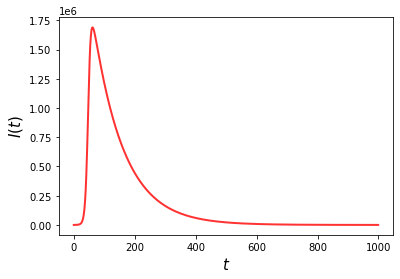

In [61]:
value_per_time={}
random_index = random.randint(0,len(N)-1)
value = np.zeros((16,4,ite_max,t_max))

for ite in range(ite_max):
    # initial conditions for each iteration
    status[random_index,0,ite]-=100
    status[random_index,2,ite]+=100
    
    for t in range(t_max):
        # let's call the function until t=tmax
        SLIR_age_contact(u,eps,mu,N,status,ite,C)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append( sum(status[j,2,ite] for j in range(16)) )
        
        for j in range(16):
            value[j,2,ite,t] = status[j,2,ite]
        #value_per_time[t].append(status[random_index,2,ite])
        
#print(value_per_time[99])
#print(median(value_per_time[99]))
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=depi.median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

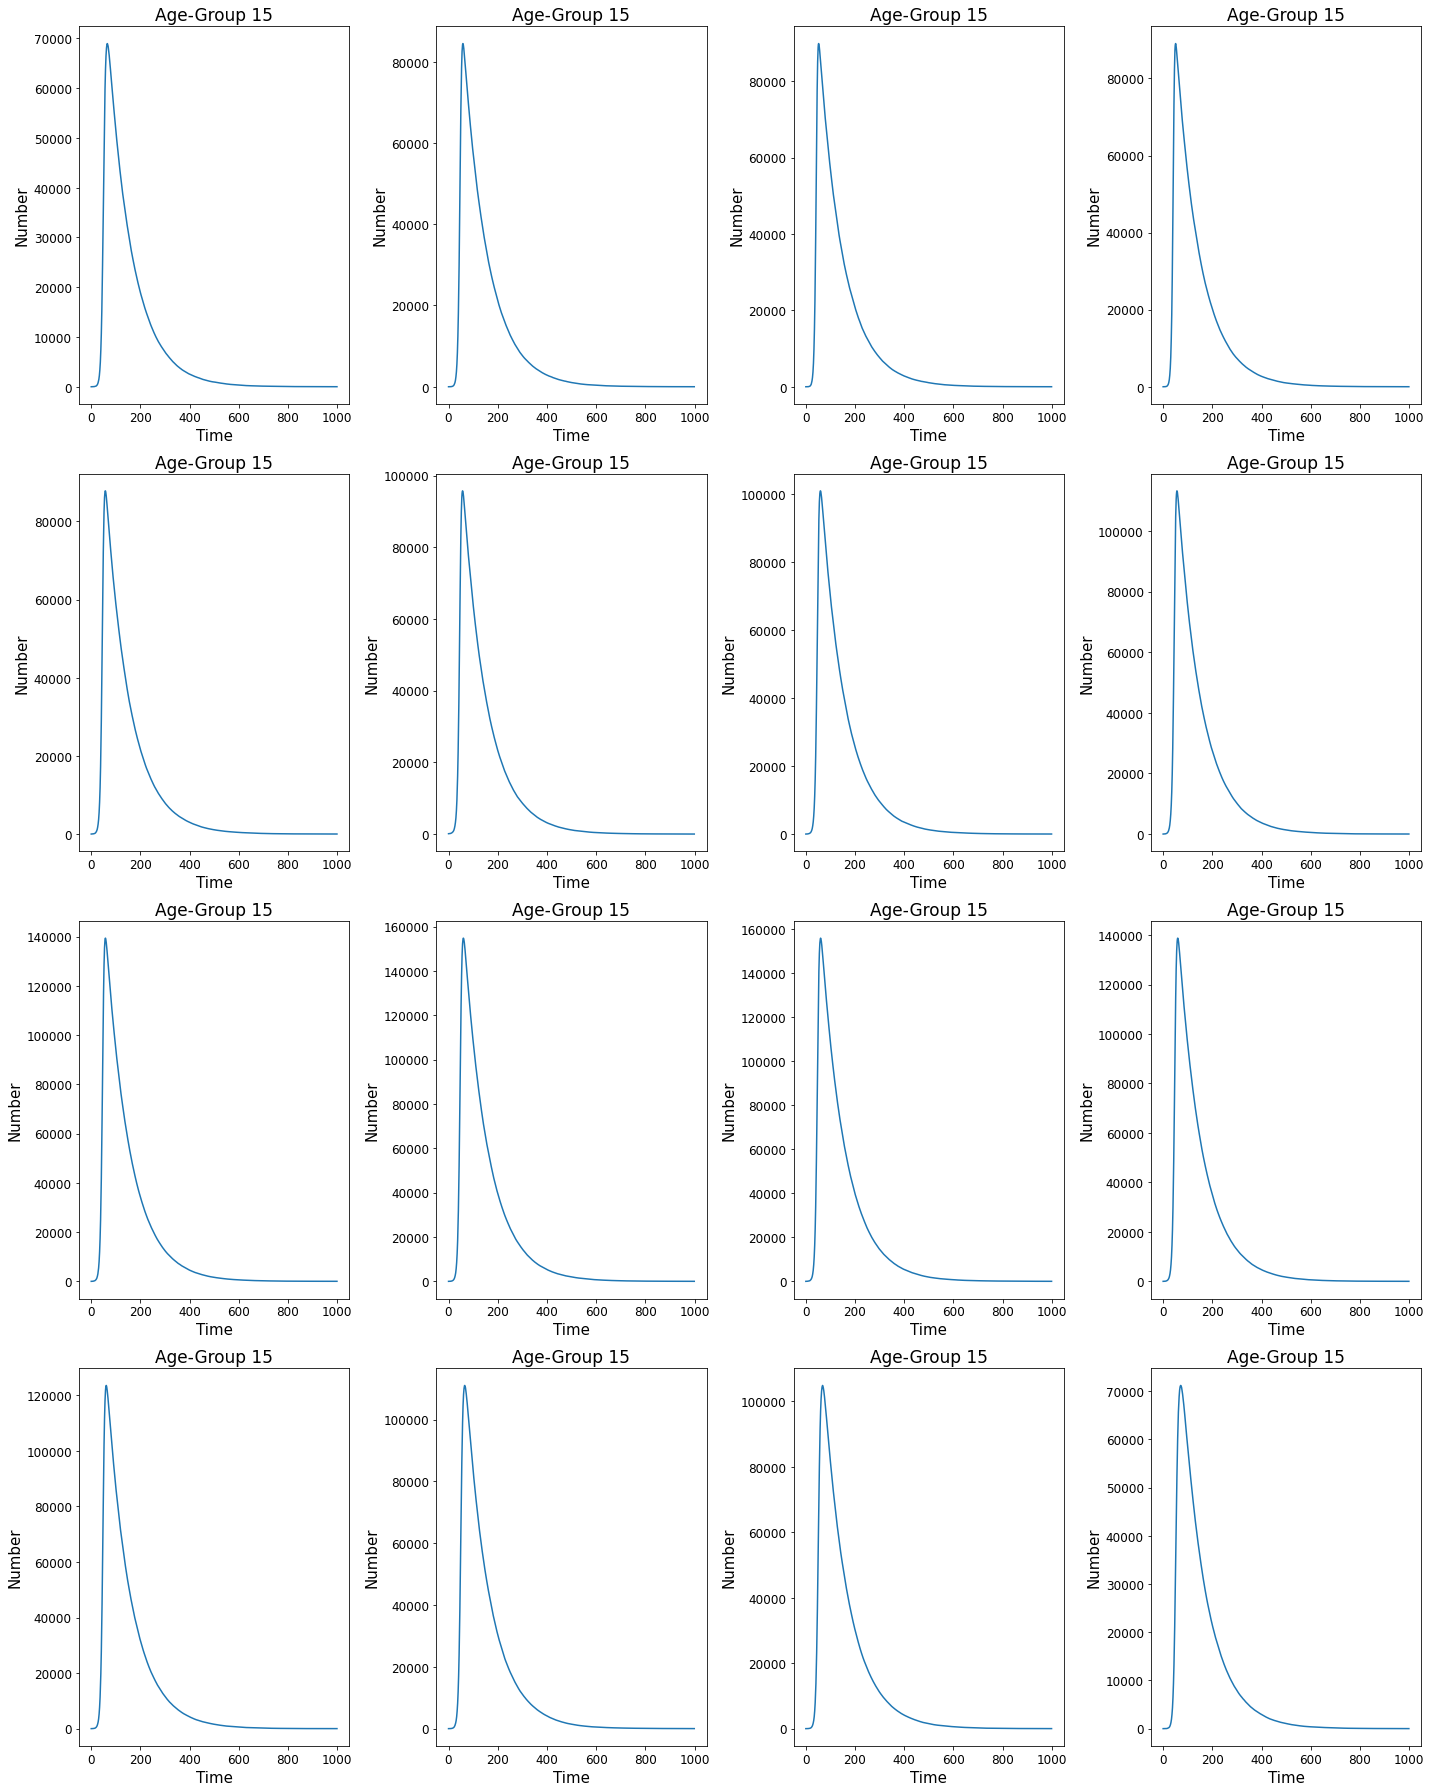

In [63]:
figure(figsize=(20, 25))
for age_group in range(16):
        plt.subplot(4, 4, age_group+1)
        #plt.semilogy()            # set semi-log scale for y axis
        plt.xticks(fontsize=12)  
        plt.yticks(fontsize=12)
        plt.xlabel("Time", fontsize=15)
        plt.ylabel("Number", fontsize=15)
        plt.title('Age-Group {}'.format(j), fontsize=17)
        plt.plot(value[age_group,2,1,:])

plt.tight_layout()

### To-Do List

1. Include Asymptomatic / Subclinical Infected Compartment & Symptomatic / Clinical Infected Compartment

2. Metapopulation implementation (onto mobility graph)